# 数据预处理

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = cifar10.load_data()

In [3]:
label_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [4]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title= str(idx)+','+str(label_dict[labels[idx][0]])
        if len(prediction)>0:
            title += "=>"+str(label_dict[prediction[idx]])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

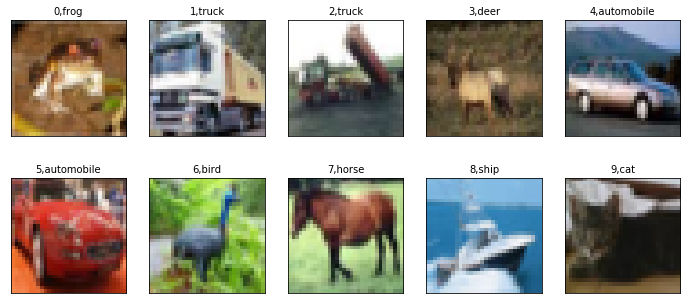

In [5]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0)

In [7]:
x_train_image[0].shape

(32, 32, 3)

In [8]:
x_Train_normalize=x_train_image/255
x_Test_normalize=x_test_image/255

In [9]:
from keras.utils import np_utils
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)

# 建立模型

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [12]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='SAME',input_shape=(32,32,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='SAME',activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=128,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 11s 278us/step - loss: 1.4861 - acc: 0.4647 - val_loss: 1.2859 - val_acc: 0.5682
Epoch 2/10
40000/40000 [==============================] - 8s 198us/step - loss: 1.1357 - acc: 0.5949 - val_loss: 1.1352 - val_acc: 0.6295
Epoch 3/10
40000/40000 [==============================] - 8s 199us/step - loss: 0.9823 - acc: 0.6536 - val_loss: 1.0170 - val_acc: 0.6605
Epoch 4/10
40000/40000 [==============================] - 8s 201us/step - loss: 0.8734 - acc: 0.6912 - val_loss: 0.9528 - val_acc: 0.6904
Epoch 5/10
40000/40000 [==============================] - 8s 198us/step - loss: 0.7834 - acc: 0.7254 - val_loss: 0.8865 - val_acc: 0.7001
Epoch 6/10
40000/40000 [==============================] - 8s 198us/step - loss: 0.7028 - acc: 0.7539 - val_loss: 0.8524 - val_acc: 0.7165
Epoch 7/10
40000/40000 [==============================] - 8s 199us/step - loss: 0.6215 - acc: 0.7827 - val_loss: 0.8227 -

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

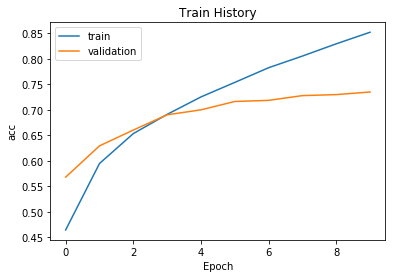

In [15]:
show_train_history(train_history,'acc','val_acc')

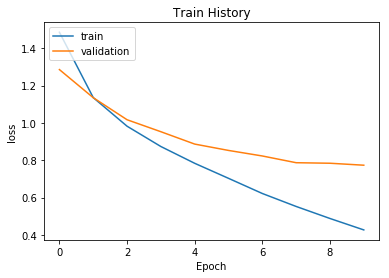

In [16]:
show_train_history(train_history,'loss','val_loss')

In [17]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 97us/step

accuracy= 0.731


In [18]:
scores=model.evaluate(x_test_image,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 90us/step

accuracy= 0.6157


In [19]:
prediction=model.predict_classes(x_Test_normalize)

In [20]:
prediction[-2]

4

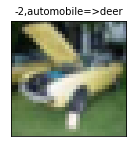

In [21]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,-2,1)

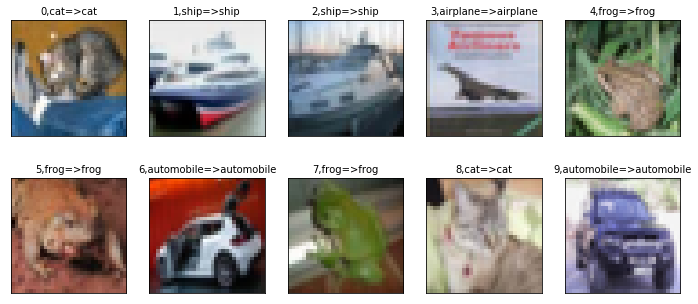

In [22]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,0,10)

In [23]:
(y_test_label.reshape(-1)!=prediction).shape

(10000,)

In [24]:
prediction.shape

(10000,)

In [25]:
y_test_label.reshape(-1)!=prediction

array([False, False, False, ..., False,  True, False])

In [26]:
to_show_x=x_test_image[y_test_label.reshape(-1)!=prediction]
to_show_y=y_test_label[y_test_label.reshape(-1)!=prediction]
to_show_p=prediction[y_test_label.reshape(-1)!=prediction]

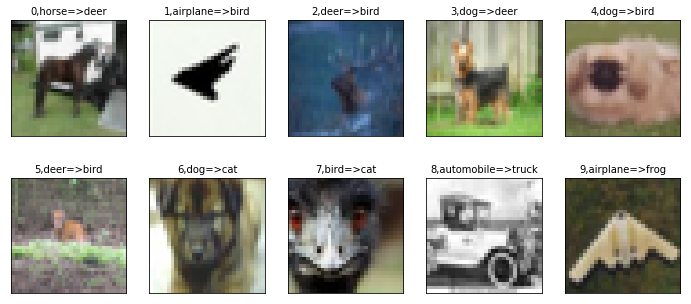

In [27]:
plot_images_labels_prediction(to_show_x,to_show_y,to_show_p,idx=0)

# 查看与猜测概率

In [28]:
Predicted_Probability = model.predict(x_Test_normalize)

In [29]:
Predicted_Probability[-2]

array([0.03253345, 0.08469824, 0.12917513, 0.00975178, 0.64259094,
       0.08204214, 0.00272929, 0.01459516, 0.00064691, 0.00123703],
      dtype=float32)

In [30]:
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+', Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


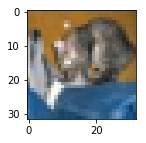

airplane, Probability:0.001434557
automobile, Probability:0.002074707
bird, Probability:0.009916575
cat, Probability:0.602900147
deer, Probability:0.001971090
dog, Probability:0.314632893
frog, Probability:0.030237380
horse, Probability:0.004431035
ship, Probability:0.031711940
truck, Probability:0.000689649


In [31]:
show_Predicted_Probability(y_test_label,prediction,x_test_image,Predicted_Probability,0)

label: automobile predict: deer


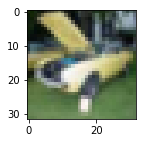

airplane, Probability:0.032533448
automobile, Probability:0.084698237
bird, Probability:0.129175127
cat, Probability:0.009751775
deer, Probability:0.642590940
dog, Probability:0.082042135
frog, Probability:0.002729292
horse, Probability:0.014595156
ship, Probability:0.000646906
truck, Probability:0.001237027


In [32]:
show_Predicted_Probability(y_test_label,prediction,x_test_image,Predicted_Probability,-2)

In [33]:
import pandas as pd
pd.crosstab(y_test_label.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,803,9,81,8,4,4,11,3,65,12
1,29,840,21,11,3,4,11,3,32,46
2,55,4,698,32,69,43,74,15,10,0
3,25,6,132,492,50,160,91,25,14,5
4,20,2,125,41,687,25,61,26,13,0
5,13,6,85,152,40,633,35,28,5,3
6,4,3,59,36,16,15,861,2,4,0
7,19,1,65,35,58,70,6,738,5,3
8,54,24,31,6,6,9,10,3,845,12


# 三次的卷积运算网络

In [34]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='SAME',input_shape=(32,32,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='SAME',activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='SAME',activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [81]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=50,batch_size=512,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 9s 229us/step - loss: 1.8508 - acc: 0.3096 - val_loss: 1.6765 - val_acc: 0.4476
Epoch 2/50
40000/40000 [==============================] - 7s 187us/step - loss: 1.4318 - acc: 0.4748 - val_loss: 1.6164 - val_acc: 0.4225
Epoch 3/50
40000/40000 [==============================] - 8s 189us/step - loss: 1.2595 - acc: 0.5450 - val_loss: 1.2046 - val_acc: 0.5926
Epoch 4/50
40000/40000 [==============================] - 8s 188us/step - loss: 1.1188 - acc: 0.6002 - val_loss: 1.1194 - val_acc: 0.6159
Epoch 5/50
40000/40000 [==============================] - 8s 193us/step - loss: 1.0187 - acc: 0.6397 - val_loss: 1.0339 - val_acc: 0.6359
Epoch 6/50
40000/40000 [==============================] - 8s 192us/step - loss: 0.9358 - acc: 0.6693 - val_loss: 1.0796 - val_acc: 0.6116
Epoch 7/50
40000/40000 [==============================] - 8s 194us/step - loss: 0.8716 - acc: 0.6920 - val_loss: 1.0819 - 

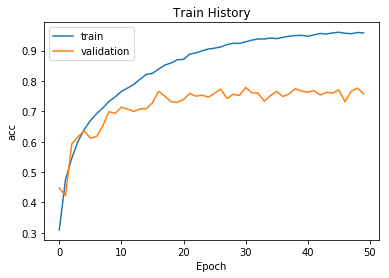

In [82]:
show_train_history(train_history,'acc','val_acc')

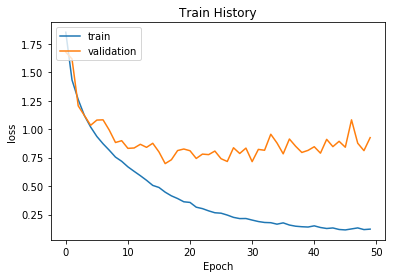

In [83]:
show_train_history(train_history,'loss','val_loss')

In [84]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 115us/step

accuracy= 0.7535


# 模型保存

In [35]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [86]:
model.save_weights("SaveModel/cifarCnnModel.h5")
print("Save OK！")

Save OK！


In [36]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='SAME',input_shape=(32,32,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='SAME',activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='SAME',activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [37]:
try:
    model.load_weights('SaveModel/cifarCnnModel.h5')
    print('Load OK!')
except:
    print('Load Failed!')

Load OK!


In [38]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=128,verbose=1)

In [39]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 131us/step

accuracy= 0.7535
